In [1]:
# !pip install pillow
# !pip install opencv-python
# !pip install matplotlib

# **Lectura de Imagenes**

## *OpenCV*

*Lectura:*   
```cv2.imread('path_to_image')```
 carga una imagen desde el archivo especificado. Por defecto, la imagen se carga en formato BGR (azul, verde, rojo).   

*Almacenamiento en memoria:*   
En OpenCV, las imágenes se almacenan como arrays de Numpy. Esto facilita la manipulación de la imagen ya que Numpy ofrece una amplia gama de operaciones matemáticas.

## *PIL*
*Lectura:*  
```Image.open('path_to_image')``` abre y carga una imagen.

*Almacenamiento en memoria:*  
PIL utiliza su propio tipo de objeto, Image, para manejar las operaciones de imagen. Sin embargo, se puede convertir fácilmente en un array de Numpy para su manipulación

# **Conversión a Arrays de Numpy y Viceversa**

*OpenCV a Numpy*  
La imagen leída por OpenCV ya es un array de Numpy, por lo que no se requiere una conversión adicional.

*PIL a Numpy*
Conversión:  
```numpy.array(pil_image)``` convierte una imagen de PIL en un array de Numpy.

*Numpy a PIL*
Conversión:
```Image.fromarray(numpy_array)``` convierte un array de Numpy en una imagen de PIL.

# Guardar Imágenes a Disco

## Matplotlib
```matplotlib.pyplot.imsave('path_to_save', numpy_array) ``` guarda una imagen. Matplotlib puede guardar arrays de Numpy como imágenes.

## OpenCV
```cv2.imwrite('path_to_save', cv2_image)``` guarda una imagen en el disco.

## PIL
```pil_image.save('path_to_save')``` guarda una imagen en el disco.


## 2.  Tomar dos fotos de una misma escena pero con diferentes iluminaciones.

### 1.) Construir en ambos casos los histogramas normalizados R,G,B (puede usar los 256 bines, u otra cantidad, por ejemplo 16 bines por cada canal de color).


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_histogram(image, title):
    plt.figure()
    bar_width = 1.0

    for i, color in enumerate(['r', 'g', 'b']):
        # Calcular histograma
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]).flatten()
        x = np.arange(256) - 0.5
        plt.bar(x, hist, width=bar_width, color=color, alpha=0.6)

        # Calcular y graficar el histograma acumulativo
        hist_cum = np.cumsum(hist)
        hist_cum = hist_cum / hist_cum.max() * hist.max()  # Normalizar para propósitos de visualización
        plt.plot(x + 0.5, hist_cum, color=color, linestyle='--')

    plt.xlim([-0.5, 255.5])
    plt.title(title)

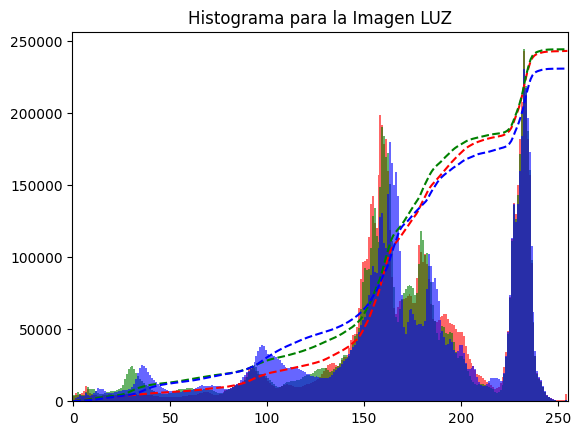

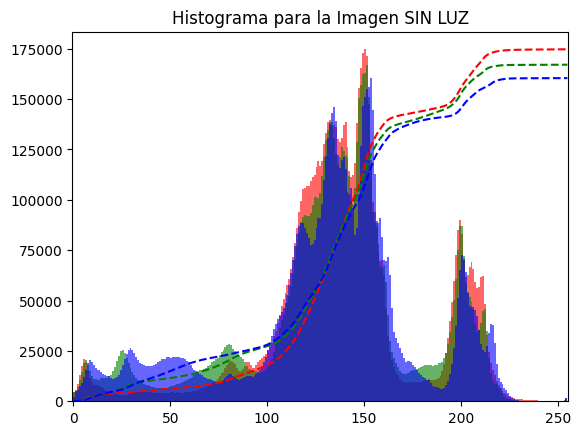

In [4]:
# Leer imágenes
image1 = cv2.imread('./imgs/luz.jpg')
image2 = cv2.imread('./imgs/noluz.jpg')

# Convertir de BGR a RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Plotear histogramas
plot_histogram(image1, 'Histograma para la Imagen LUZ')
plot_histogram(image2, 'Histograma para la Imagen SIN LUZ')

plt.show()

Podemos observar que la imagen con menos luz tiene un histograma más concentrado en los valores bajos, mientras que la imagen con más luz tiene un histograma más concentrado en los valores altos. Ademas que la acumulada del histograma de la imagen con menos luz es más pronunciada que la de la imagen con más luz.

### 2.) Proponer una Distancia para Comparar Histogramas
En este caso usaremos la sumatoria de la diferencia al cuadrado

In [31]:
def compare_histograms(hist1, hist2):
    return np.sqrt(np.sum((hist1 - hist2) ** 2))



In [27]:

# Calcular histogramas para cada canal de color
hist_image1 = [cv2.calcHist([image1], [i], None, [256], [0, 256]) for i in range(3)]
hist_image2 = [cv2.calcHist([image2], [i], None, [256], [0, 256]) for i in range(3)]

# Comparar histogramas
distances = [compare_histograms(hist_image1[i], hist_image2[i]) for i in range(3)]
print("Distancias RGB: ", distances)


Distancias RGB:  [9906530.0, 9579100.0, 9138230.0]


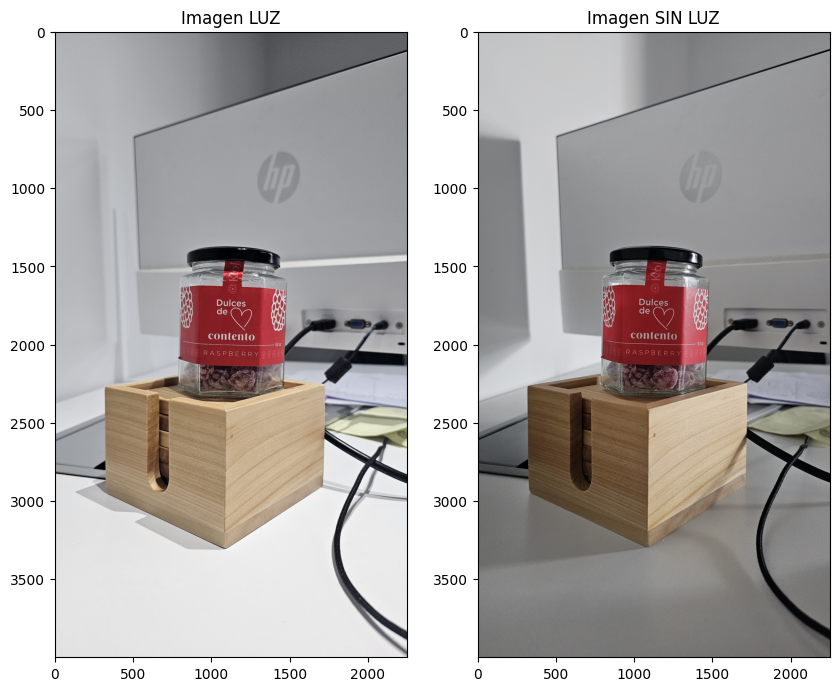

In [7]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image1,vmax=255,vmin=0)
plt.title('Imagen LUZ')
plt.subplot(1, 2, 2)
plt.imshow(image2,vmax=255,vmin=0)
plt.title('Imagen SIN LUZ')
plt.show()


### 3.) COMPARAR CON OTRAS IMAGENES

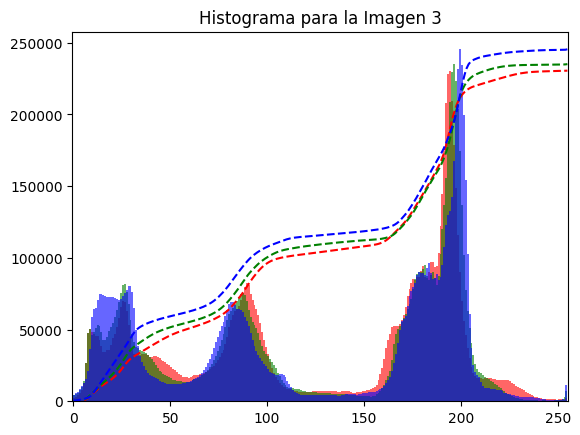

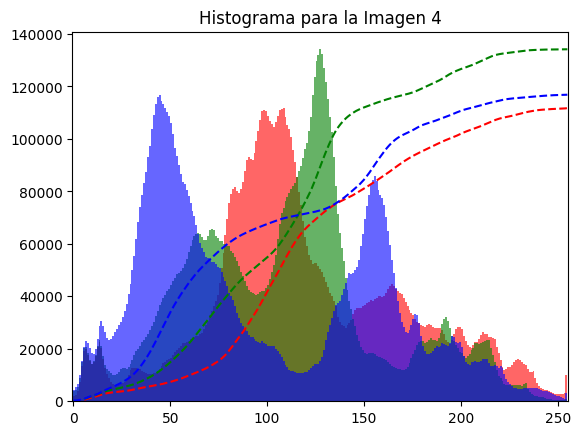

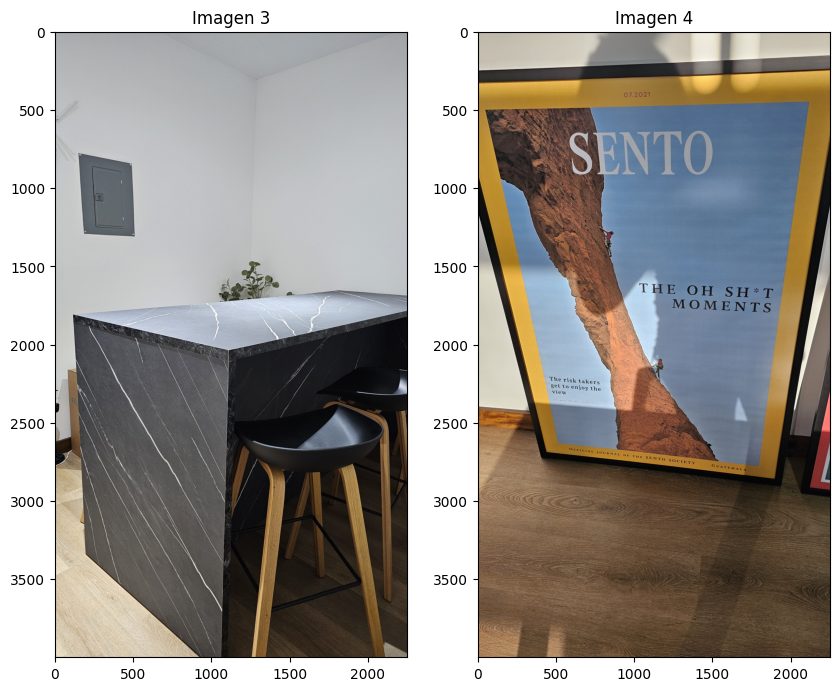

In [8]:
# Leer imágenes
image3 = cv2.imread('./imgs/mesa.jpg')
image4 = cv2.imread('./imgs/cuadro.jpg')

# Convertir de BGR a RGB
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Plotear histogramas
plot_histogram(image3, 'Histograma para la Imagen 3')
plot_histogram(image4, 'Histograma para la Imagen 4')

plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image3,vmax=255,vmin=0)
plt.title('Imagen 3')
plt.subplot(1, 2, 2)
plt.imshow(image4,vmax=255,vmin=0)
plt.title('Imagen 4')
plt.show()


In [30]:

# Calcular histogramas para cada canal de color
hist_image3 = [cv2.calcHist([image3], [i], None, [256], [0, 256]) for i in range(3)]
hist_image4 = [cv2.calcHist([image4], [i], None, [256], [0, 256]) for i in range(3)]

# Comparar histogramas
distances13 = [compare_histograms(hist_image1[i], hist_image3[i]) for i in range(3)]
distances14 = [compare_histograms(hist_image1[i], hist_image4[i]) for i in range(3)]
distances23 = [compare_histograms(hist_image2[i], hist_image3[i]) for i in range(3)]
distances24 = [compare_histograms(hist_image2[i], hist_image4[i]) for i in range(3)]

# sumar los datos de un array
distances = np.sum(distances)
distances13 = np.sum(distances13)
distances14 = np.sum(distances14)
distances23 = np.sum(distances23)
distances24 = np.sum(distances24)

print("DIFERENCIA ENTRE IMAGEN 1 Y 2: ", distances)
print("--------------------------------------")
print("DIFERENCIA ENTRE IMAGEN 1 Y 3: ", distances13)
print("DIFERENCIA ENTRE IMAGEN 1 Y 4: ", distances14)
print("--------------------------------------")
print("DIFERENCIA ENTRE IMAGEN 2 Y 3: ", distances23)
print("DIFERENCIA ENTRE IMAGEN 2 Y 4: ", distances24)


DIFERENCIA ENTRE IMAGEN 1 Y 2:  28623860.0
--------------------------------------
DIFERENCIA ENTRE IMAGEN 1 Y 3:  2882308.2
DIFERENCIA ENTRE IMAGEN 1 Y 4:  2733706.0
--------------------------------------
DIFERENCIA ENTRE IMAGEN 2 Y 3:  3040183.0
DIFERENCIA ENTRE IMAGEN 2 Y 4:  2036831.5


Las diferencias de las imagenes son bastante notorias, por lo que la distancia entre los histogramas deberia ser bastante grande. Esto se podria deber a que los datos no estan normalizados, por lo que la diferencia entre los histogramas es muy grande. Adicionalmente la imagen con mayor diefernecia fueron las que son iguales pero con diferente luz (1 y 2), lo que nos indica que la diferencia entre los histogramas es bastante grande.

### 4.) Convertir a HSV

In [10]:
image1_hsv = cv2.cvtColor(image1, cv2.COLOR_RGB2HSV)
image2_hsv = cv2.cvtColor(image2, cv2.COLOR_RGB2HSV)
image3_hsv = cv2.cvtColor(image3, cv2.COLOR_RGB2HSV)
image4_hsv = cv2.cvtColor(image4, cv2.COLOR_RGB2HSV)


### 5.) Histograma en H,S


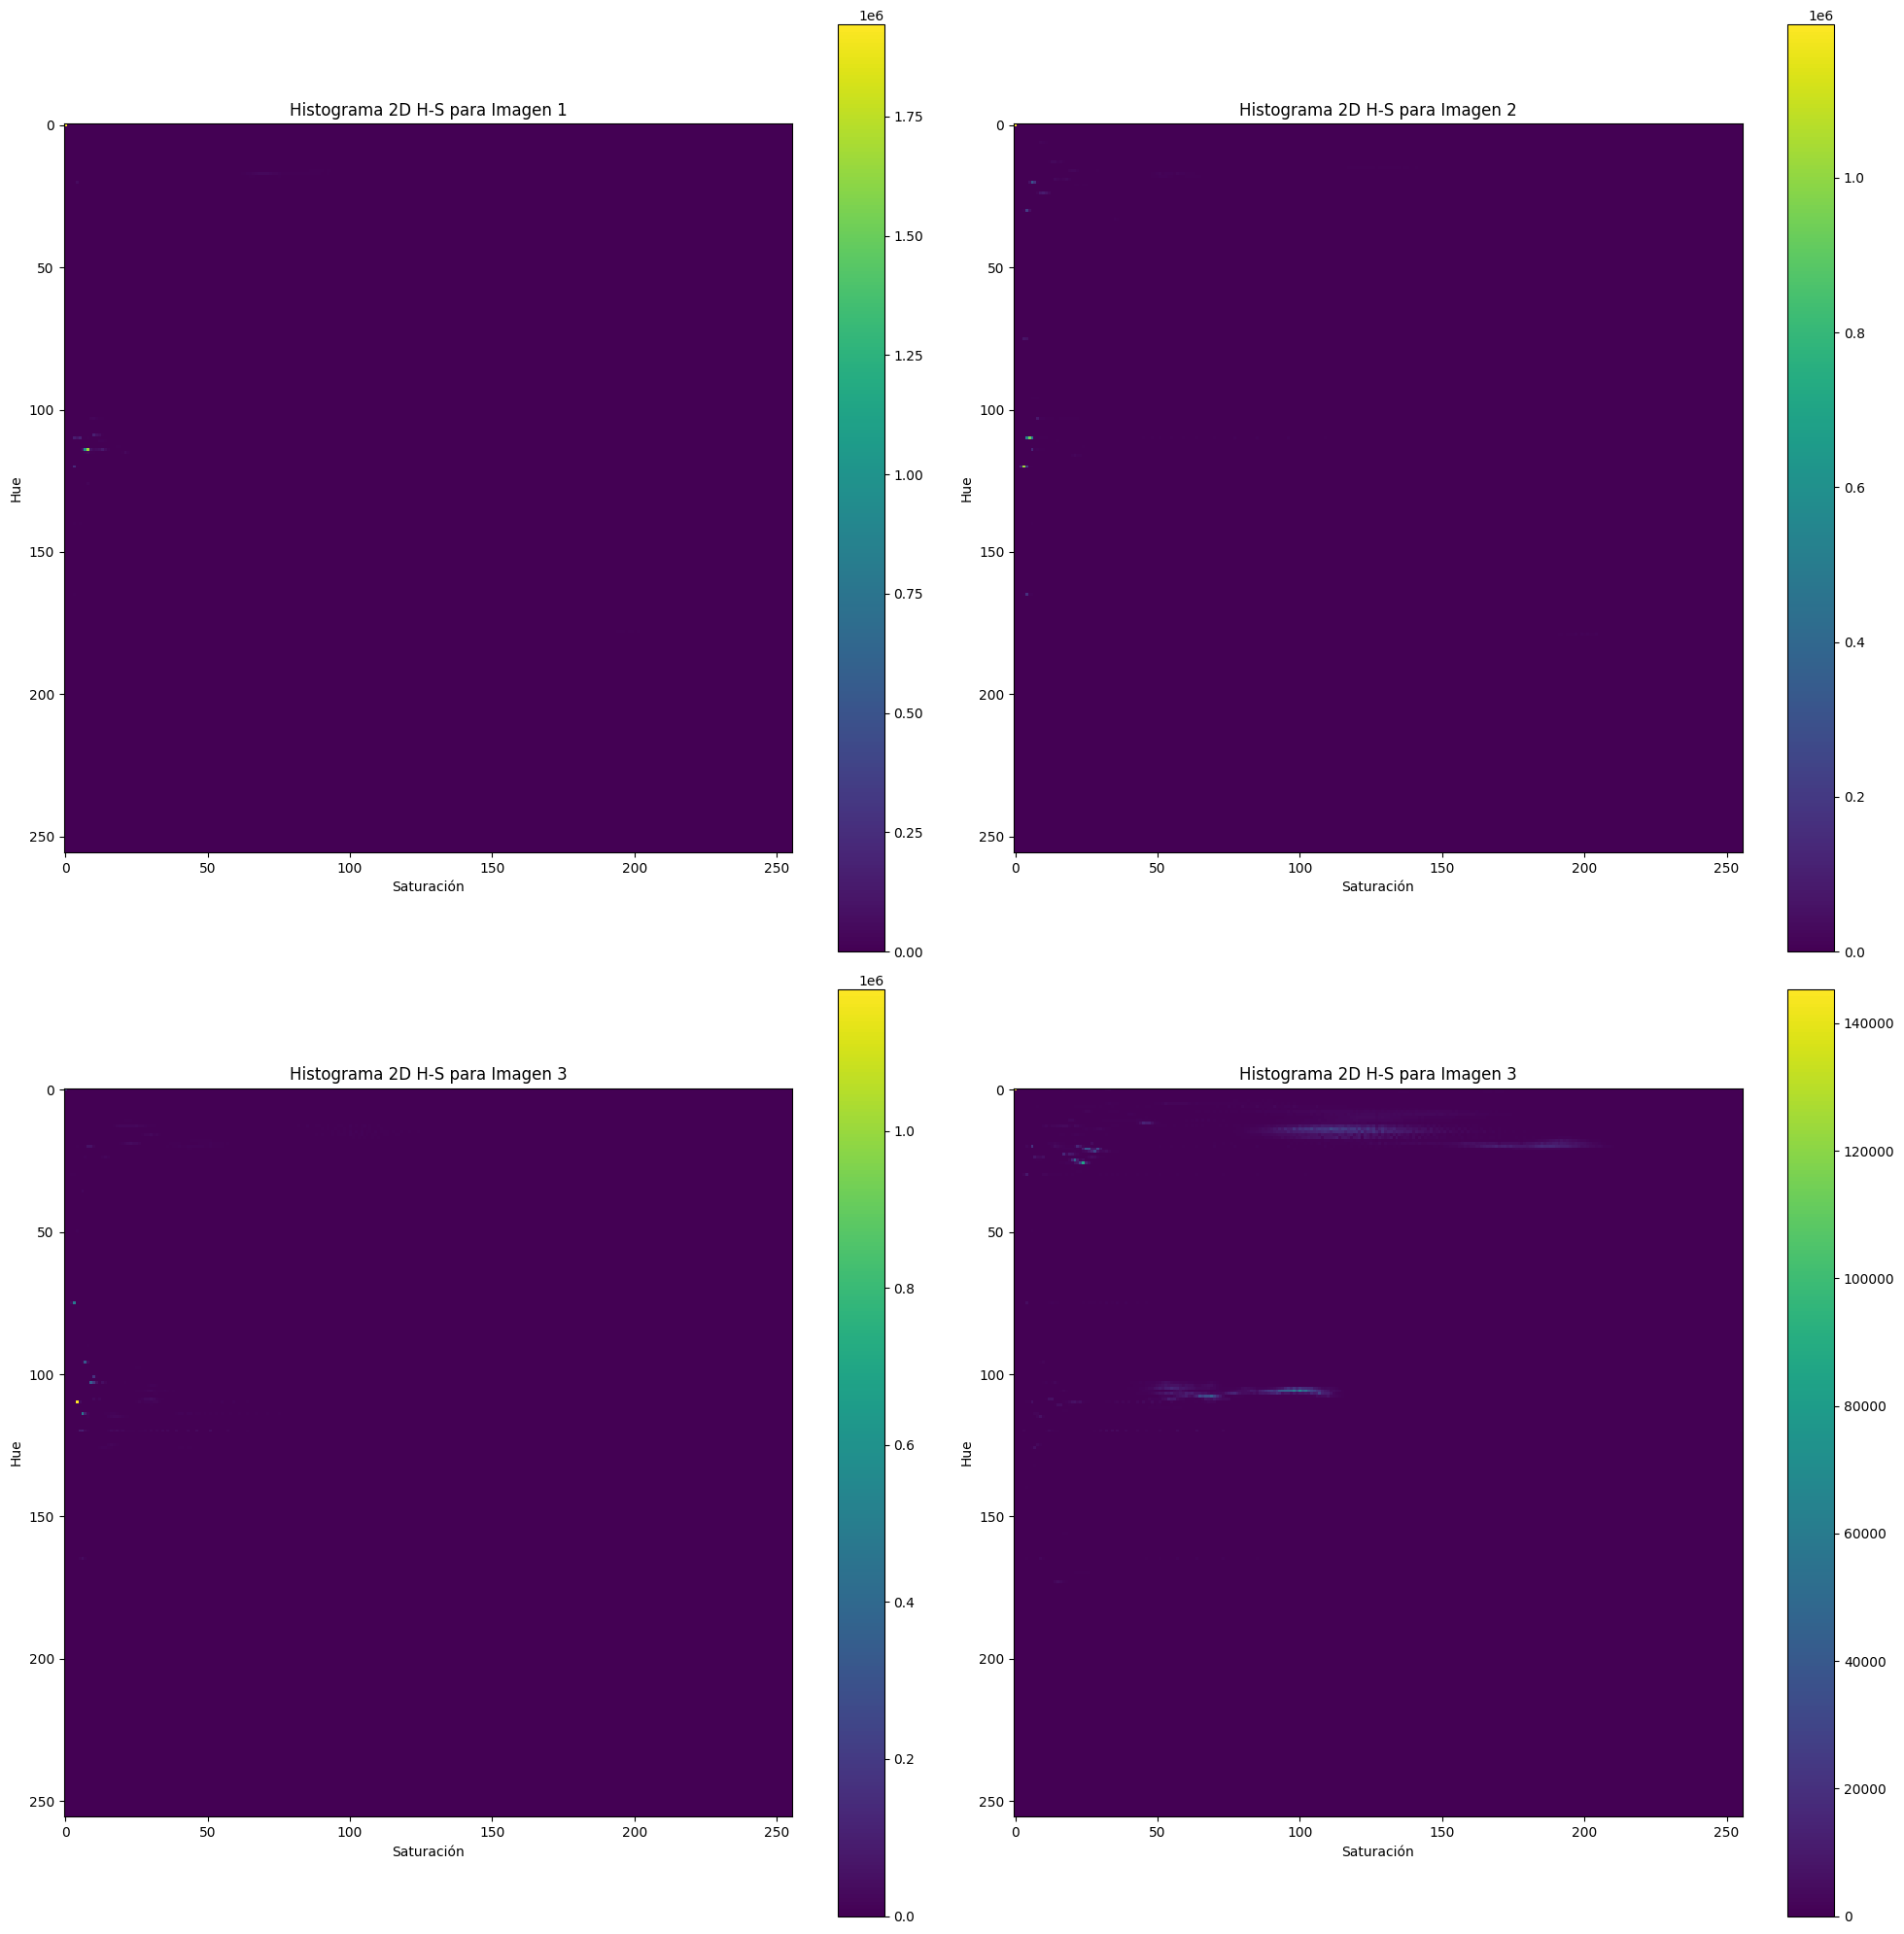

In [16]:
plt.figure(figsize=(20, 20))

# Histograma 2D H-S para Imagen 1
plt.subplot(2, 2, 1)  
hist1 = cv2.calcHist([image1_hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])
plt.imshow(hist1, interpolation='nearest')
plt.title('Histograma 2D H-S para Imagen 1')
plt.xlabel('Saturación')
plt.ylabel('Hue')
plt.colorbar()  # Opcional, para mostrar la escala de colores

# Histograma 2D H-S para Imagen 2
plt.subplot(2, 2, 2)  
hist2 = cv2.calcHist([image2_hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])
plt.imshow(hist2, interpolation='nearest')
plt.title('Histograma 2D H-S para Imagen 2')
plt.xlabel('Saturación')
plt.ylabel('Hue')
plt.colorbar()  # Opcional, para mostrar la escala de colores

# Histograma 2D H-S para Imagen 3
plt.subplot(2, 2, 3) 
hist2 = cv2.calcHist([image3_hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])
plt.imshow(hist2, interpolation='nearest')
plt.title('Histograma 2D H-S para Imagen 3')
plt.xlabel('Saturación')
plt.ylabel('Hue')
plt.colorbar()  # Opcional, para mostrar la escala de colores

# Histograma 2D H-S para Imagen 4
plt.subplot(2, 2, 4) 
hist2 = cv2.calcHist([image4_hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])
plt.imshow(hist2, interpolation='nearest')
plt.title('Histograma 2D H-S para Imagen 3')
plt.xlabel('Saturación')
plt.ylabel('Hue')
plt.colorbar()  # Opcional, para mostrar la escala de colores

plt.tight_layout()
plt.show()


In [23]:
hist1 = cv2.calcHist([image1_hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])
hist2 = cv2.calcHist([image2_hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])
hist3 = cv2.calcHist([image3_hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])
hist4 = cv2.calcHist([image4_hsv], [0, 1], None, [256, 256], [0, 256, 0, 256])


In [25]:
import cv2

# Suponiendo que hist1, hist2, hist3, hist4 son los histogramas de tus imágenes en HSV

# Normalizar los histogramas
cv2.normalize(hist1, hist1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist2, hist2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist3, hist3, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist4, hist4, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Comparar histogramas
# Por ejemplo, comparando imagen 1 con el resto usando la correlación
correl12 = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
correl13 = cv2.compareHist(hist1, hist3, cv2.HISTCMP_CHISQR)
correl14 = cv2.compareHist(hist1, hist4, cv2.HISTCMP_CHISQR)

# Imprimir resultados de comparación
print(f"Correlación entre Imagen 1 e Imagen 2: {correl12}")
print(f"Correlación entre Imagen 1 e Imagen 3: {correl13}")
print(f"Correlación entre Imagen 1 e Imagen 4: {correl14}")

# Repetir para otros pares según sea necesario


Correlación entre Imagen 1 e Imagen 2: 1622.3886281866864
Correlación entre Imagen 1 e Imagen 3: 2009.9608573445425
Correlación entre Imagen 1 e Imagen 4: 844489.1324135875


En este caso podemos observar que las imagenes en formato de HSV tienen un histograma mas en forma de zonas y no tanto uno de la dispersion de los colores, esto se debe a que el formato HSV es menos intuitivo para el ojo humano, pero es más fácil de procesar por las computadoras. Por lo mismo podemos observar que la diferencia al cuadrado entre los histogramas de las imagenes es menor que en el caso anterior y las imagenes que se parecen mas (Imagen 1 y Imagen 2) son las que un menor valor de diferencia al cuadrado tienen, que es lo que apunta el chisquare para que una imagen sea parecida a otra. Al igual que se realizo una normalizacion de lso datos podemos observar que eso ayudo a que los valores fueran mucho menores que en el caso anterior.

## 3. Implementar una funcion de equalizacion de histograma para una imagen en escala de grises.

In [13]:
def histEq(I):
  Iflat = I.ravel()

  histogram_array = np.bincount(Iflat,minlength=256)

  #normalize
  num_pixeles = histogram_array.sum()
  histogram_array = histogram_array / num_pixeles

  # cumulative histogram
  chistogram_array = histogram_array.cumsum()
  transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

  img_list = list(Iflat)

  eg_img_list = [transform_map[p] for p in img_list]

  Ieq = np.reshape(np.asarray(eg_img_list),I.shape)

  return Ieq


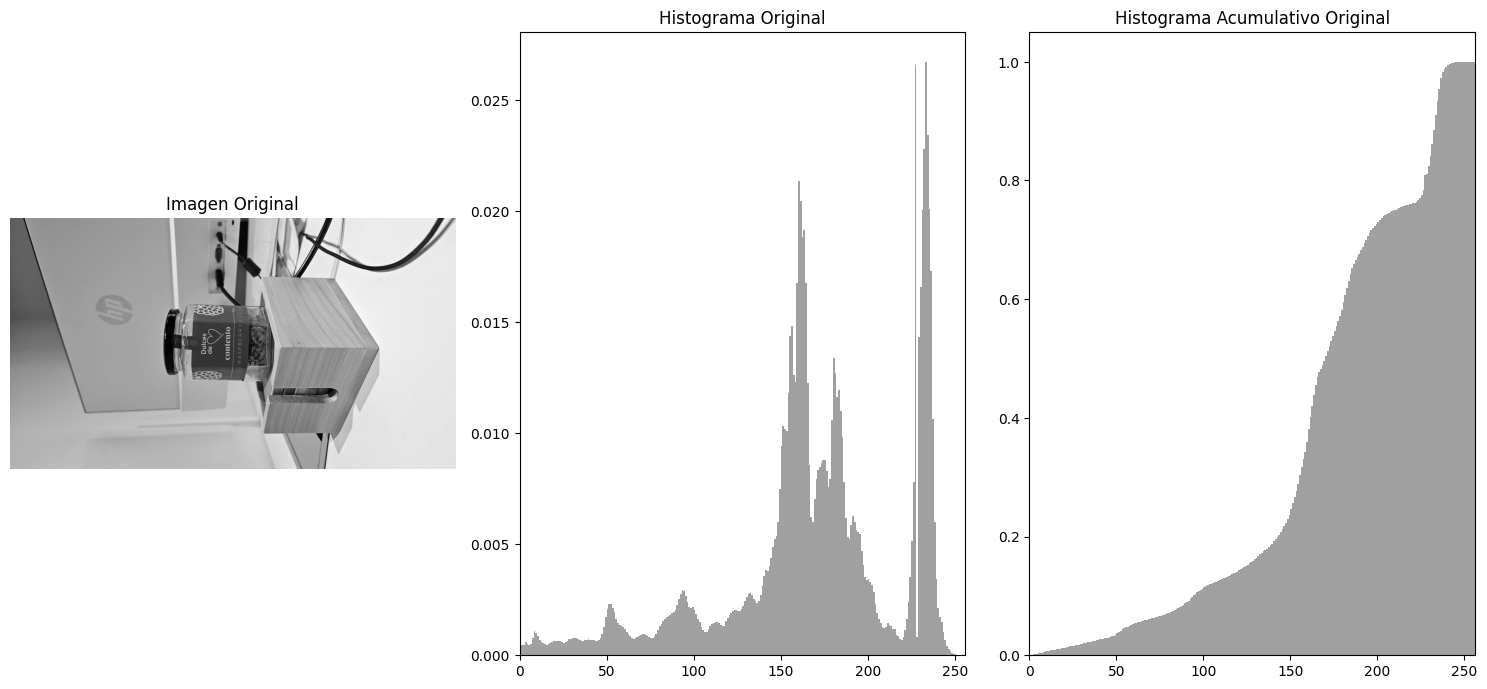

In [20]:
import numpy as np
import cv2
from skimage import exposure, io
import matplotlib.pyplot as plt


# Cargamos una imagen de muestra en escala de grises
sample_image = io.imread('./imgs/luz.jpg', as_gray=True)
sample_image = (sample_image * 255).astype(np.uint8)  # Convertir a 8 bits

# Aplicar la función histEq
equalized_image_custom = histEq(sample_image)

# Usar las funciones de skimage y cv2 para la ecualización
equalized_image_skimage = exposure.equalize_hist(sample_image)
equalized_image_skimage = (equalized_image_skimage * 255).astype(np.uint8)  # Convertir a 8 bits para comparar

equalized_image_cv2 = cv2.equalizeHist(sample_image)

# Mostrar las imágenes y los histogramas
plt.figure(figsize=(15, 20))

# Imagen original
plt.subplot(3, 3, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Histograma original
plt.subplot(3, 3, 2)
plt.hist(sample_image.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75)
plt.title('Histograma Original')
plt.xlim([0, 256])

# Histograma acumulativo original
plt.subplot(3, 3, 3)
plt.hist(sample_image.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75, cumulative=True)
plt.title('Histograma Acumulativo Original')
plt.xlim([0, 256])


plt.tight_layout()
plt.show()



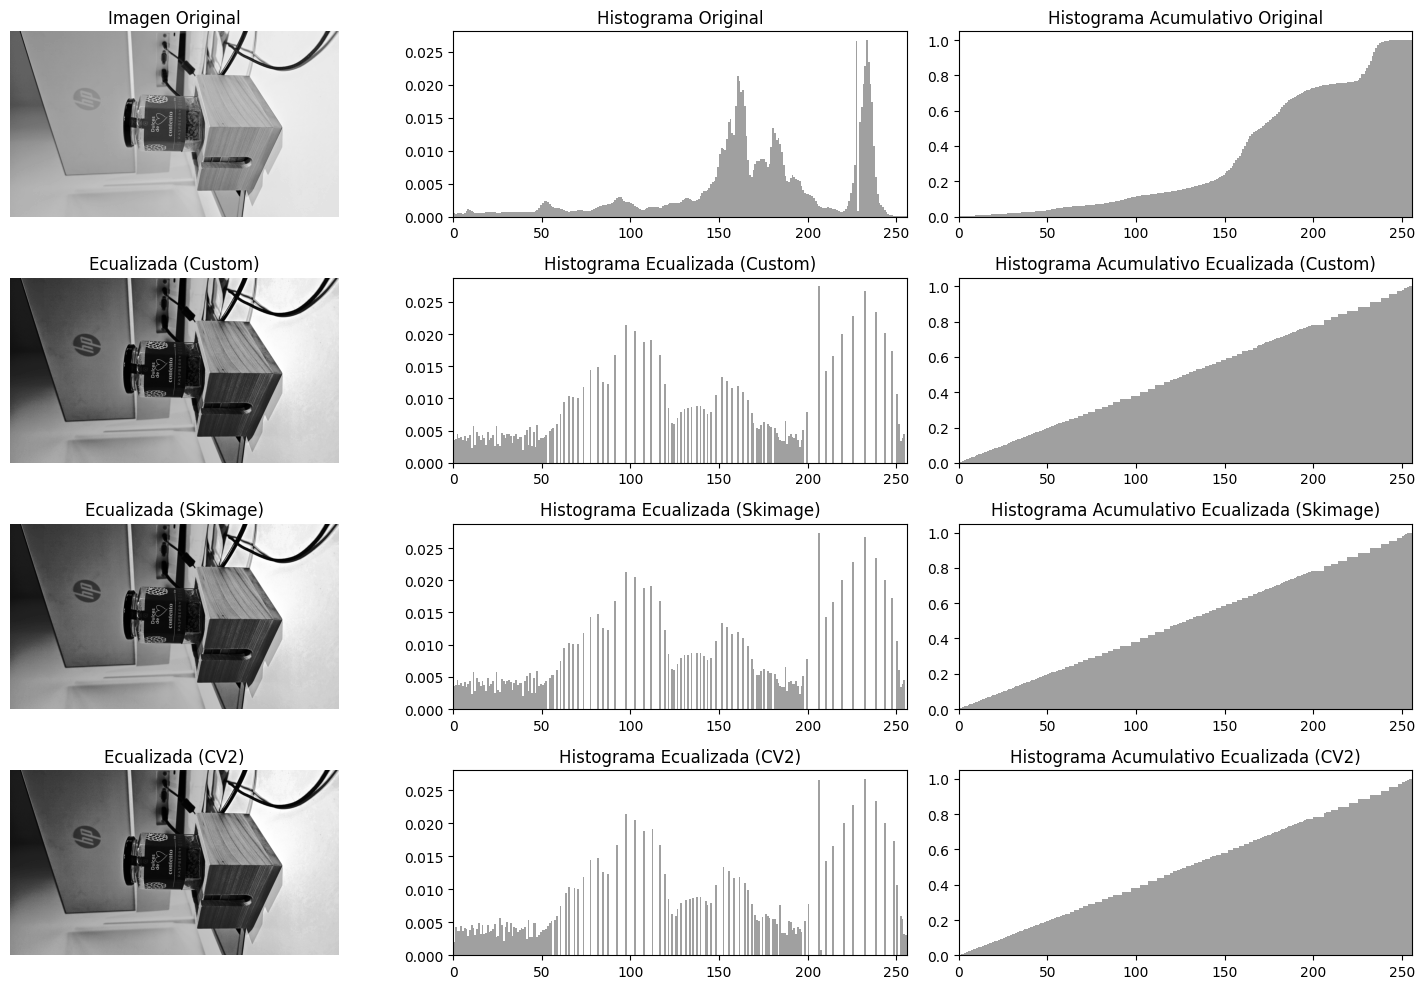

In [33]:
import numpy as np
import cv2
from skimage import exposure, io
import matplotlib.pyplot as plt


# Cargamos una imagen de muestra en escala de grises
sample_image = io.imread('./imgs/luz.jpg', as_gray=True)
sample_image = (sample_image * 255).astype(np.uint8)  # Convertir a 8 bits

# Aplicar la función histEq
equalized_image_custom = histEq(sample_image)

# Usar las funciones de skimage y cv2 para la ecualización
equalized_image_skimage = exposure.equalize_hist(sample_image)
equalized_image_skimage = (equalized_image_skimage * 255).astype(np.uint8)  # Convertir a 8 bits para comparar

equalized_image_cv2 = cv2.equalizeHist(sample_image)

# Mostrar las imágenes y los histogramas
plt.figure(figsize=(15, 20))

# Imagen original
plt.subplot(4, 3, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Histograma original
plt.subplot(4, 3, 2)
plt.hist(sample_image.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75)
plt.title('Histograma Original')
plt.xlim([0, 256])

# Histograma acumulativo original
plt.subplot(4, 3, 3)
plt.hist(sample_image.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75, cumulative=True)
plt.title('Histograma Acumulativo Original')
plt.xlim([0, 256])


# Imagen ecualizada (custom)
plt.subplot(4, 3, 4)
plt.imshow(equalized_image_custom, cmap='gray')
plt.title('Ecualizada (Custom)')
plt.axis('off')

# Histograma ecualizada (custom)
plt.subplot(4, 3, 5)
plt.hist(equalized_image_custom.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75)
plt.title('Histograma Ecualizada (Custom)')
plt.xlim([0, 256])

# Histograma acumulativo ecualizada (custom)
plt.subplot(4, 3, 6)
plt.hist(equalized_image_custom.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75, cumulative=True)
plt.title('Histograma Acumulativo Ecualizada (Custom)')
plt.xlim([0, 256])

# Imagen ecualizada (skimage)
plt.subplot(4, 3, 7)
plt.imshow(equalized_image_skimage, cmap='gray')
plt.title('Ecualizada (Skimage)')
plt.axis('off')

# Histograma de la imagen ecualizada con skimage
plt.subplot(4, 3, 8)
plt.hist(equalized_image_skimage.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75)
plt.title('Histograma Ecualizada (Skimage)')
plt.xlim([0, 256])

# Histograma acumulativo de la imagen ecualizada con skimage
plt.subplot(4, 3, 9)
plt.hist(equalized_image_skimage.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75, cumulative=True)
plt.title('Histograma Acumulativo Ecualizada (Skimage)')
plt.xlim([0, 256])

# Imagen ecualizada (cv2)
plt.subplot(4, 3, 10)
plt.imshow(equalized_image_cv2, cmap='gray')
plt.title('Ecualizada (CV2)')
plt.axis('off')

# Histograma de la imagen ecualizada con cv2
plt.subplot(4, 3, 11)
plt.hist(equalized_image_cv2.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75)
plt.title('Histograma Ecualizada (CV2)')
plt.xlim([0, 256])

# Histograma acumulativo de la imagen ecualizada con cv2
plt.subplot(4, 3, 12)
plt.hist(equalized_image_cv2.ravel(), bins=256, range=[0,256], density=True, color='gray', alpha=0.75, cumulative=True)
plt.title('Histograma Acumulativo Ecualizada (CV2)')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()
